In [1]:
%matplotlib inline
import quandl
import pandas as pd
from pandas import Series, DataFrame
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

#### create an account with quandl to acess its data through API integration
#### use this link to signup : https://www.quandl.com/sign-up-modal?defaultModal=showSignUp
#### after creation of account you would get the API - KEY
#### Insert it  below below

In [2]:
quandl.ApiConfig.api_key = 'INSERT YOUR API KEY HERE'

In [3]:
stock_list = ['AAPL','AMZN', 'MSFT', 'GOOG']
start = datetime(2016, 12, 31)
end = datetime.now()

In [4]:
file = quandl.get_table('WIKI/PRICES', ticker = stock_list, 
                        #qopts = { 'columns': ['ticker', 'date', 'adj_close'] }, ## select the columns you might want or select all 
                        date = { 'gte': start, 'lte': end }, 
                        paginate=True).set_index("date")

In [5]:
file.head()

,ticker,open,high,low,close,volume,ex-dividend,split_ratio,adj_open,adj_high,adj_low,adj_close,adj_volume
date,,,,,,,,,,,,,
2017-01-03,AAPL,115.80,116.3300,114.76,116.15,28781865.0,0.0,1.0,114.369701,114.893155,113.342546,114.715378,28781865.0
2017-01-04,AAPL,115.85,116.5100,115.75,116.02,21118116.0,0.0,1.0,114.419083,115.070931,114.320318,114.586983,21118116.0
2017-01-05,AAPL,115.92,116.8642,115.81,116.61,22193587.0,0.0,1.0,114.488219,115.420756,114.379577,115.169696,22193587.0
2017-01-06,AAPL,116.78,118.1600,116.47,117.91,31751900.0,0.0,1.0,115.337596,116.700551,115.031425,116.453639,31751900.0
2017-01-09,AAPL,117.95,119.4300,117.94,118.99,33561948.0,0.0,1.0,116.493145,117.954865,116.483269,117.520300,33561948.0


In [6]:
AAPL = file[file.ticker=="AAPL"]
AMZN = file[file.ticker=="AMZN"]
MSFT = file[file.ticker=="MSFT"]
GOOG = file[file.ticker=="GOOG"]

In [7]:
df_APPL = AAPL["adj_close"]

In [8]:
df_APPL.head()

date
2017-01-03    114.715378
2017-01-04    114.586983
2017-01-05    115.169696
2017-01-06    116.453639
2017-01-09    117.520300
Name: adj_close, dtype: float64

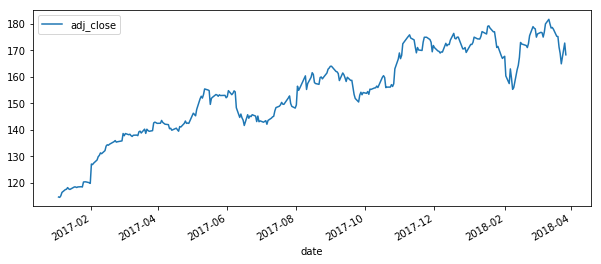

In [9]:
df_APPL.plot(legend=True, figsize=(10,4))

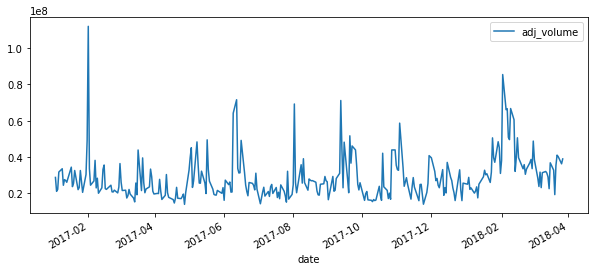

In [10]:
AAPL['adj_volume'].plot(legend=True,figsize=(10,4))

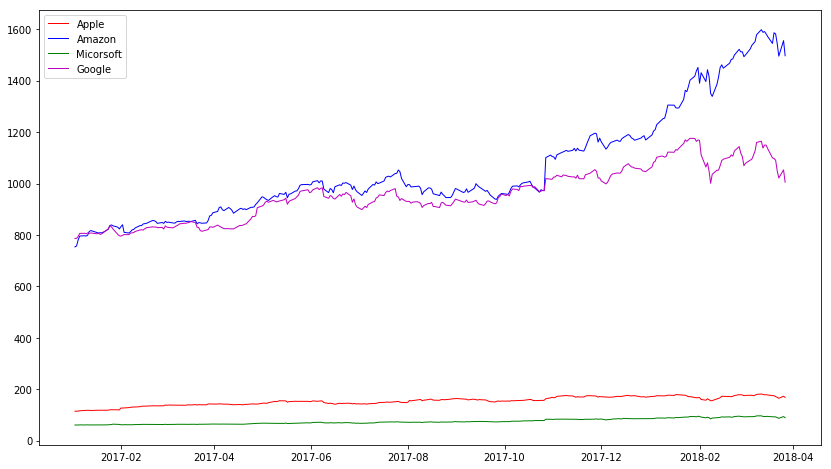

In [11]:
#plot all
plt.figure(figsize=(14,8))
plt.plot(AAPL['adj_close'],'r',label="Apple",linewidth=1)
plt.plot(AMZN['adj_close'],'b',label="Amazon",linewidth=1)
plt.plot(MSFT['adj_close'],'g',label="Micorsoft",linewidth=1)
plt.plot(GOOG['adj_close'],'m',label="Google",linewidth=1)
plt.legend()
plt.show()

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


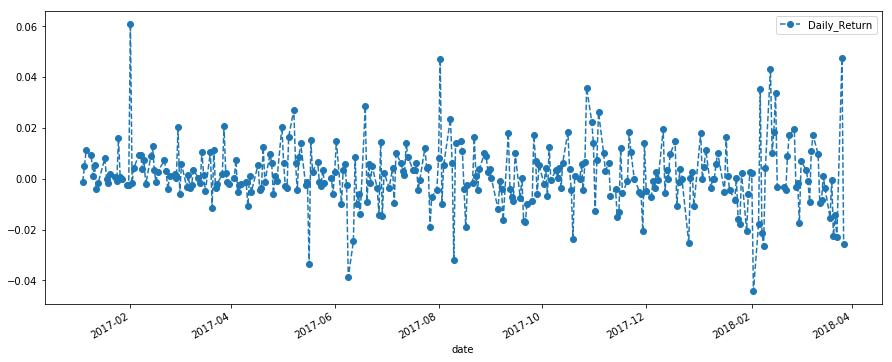

In [12]:
AAPL['Daily_Return'] = AAPL['adj_close'].pct_change()
AAPL['Daily_Return'].plot(figsize=(15,6),legend=True,linestyle='--',marker='o')

In [13]:
closing_price_stock = quandl.get_table('WIKI/PRICES', ticker = stock_list, 
                        qopts = { 'columns': ['ticker', 'date', 'adj_close'] }, ## select the columns you might want or select all 
                        date = { 'gte': start, 'lte': end }, 
                        paginate=True).pivot(index="date",columns='ticker', values='adj_close')

In [14]:
closing_price_stock.head()

ticker,AAPL,AMZN,GOOG,MSFT
date,,,,
2017-01-03,114.715378,753.67,786.14,61.219142
2017-01-04,114.586983,757.18,786.90,60.945231
2017-01-05,115.169696,780.45,794.02,60.945231
2017-01-06,116.453639,795.99,806.15,61.473488
2017-01-09,117.520300,796.92,806.65,61.277837


In [15]:
stock_returns = closing_price_stock.pct_change()

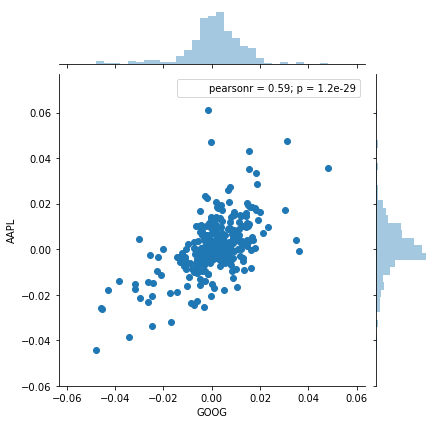

In [16]:
sns.jointplot('GOOG','AAPL',stock_returns,kind='scatter')

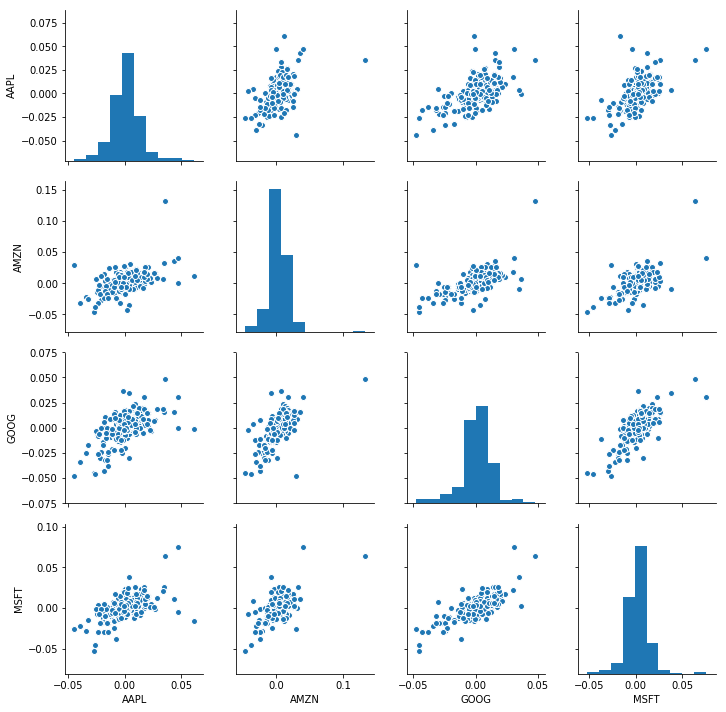

In [17]:
sns.pairplot(stock_returns.dropna())

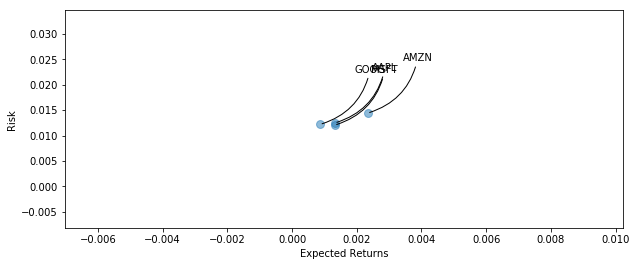

In [18]:
returns = stock_returns.dropna()
area = np.pi*20
plt.figure(figsize=(10,4))
plt.scatter(returns.mean(),returns.std(),alpha=0.5,s=area)
plt.xlabel('Expected Returns')
plt.ylabel('Risk')
for label, x, y in zip(returns.columns, returns.mean(), returns.std()):
    plt.annotate(
        label,
        xy = (x,y), xytext = (50,50),
        textcoords = 'offset points', ha='center', va='bottom',
        arrowprops = dict(arrowstyle = '-', connectionstyle = 'arc3,rad=-0.3'))